**pdmP/ 
├─ data/
│  ├─ train_FD004.txt 
│  ├─ test_FD004.txt 
│  └─ RUL_test_FD004.txt 
├─ notebooks/
│  ├─ 01_explore.ipynb
│  ├─ 02_feature_engineering.ipynb
│  └─ 03_modeling.ipynb
├─ src/
│  ├─ data_loading.py
│  ├─ features.py
│  ├─ train.py
│  └─ predict.py
├─ gui/
│  └─ app.py  # PyQt5
├─ api/
│  └─ app.py  #FastAPI 
├─ models/
├─ requirements.txt
└─ README.md
i am following this str


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("ggplot")
sns.set(font_scale=1.2)

In [5]:
dirName=Path("..")/"data/beforeProcessing"
FD="FD004"
columnNames=['unit', 'cycle'] + [f"op{i}" for i in range(1,4)] + [f"s{i}" for i in range(1,22)]
train = pd.read_csv(dirName/f'train_{FD}.txt' , sep=r"\s+", header = None, names=columnNames)
test = pd.read_csv(dirName/f'test_{FD}.txt', sep="\s+", header = None, names=columnNames)
RUL= pd.read_csv(dirName/f'RUL_{FD}.txt', sep="\s+", header=None).squeeze()

train.to_csv("train_FD004.csv", index=False)

print(train.shape)
print(test.shape)
print(RUL.shape)

(61249, 26)
(41214, 26)
(248,)


In [6]:
train.columns

Index(['unit', 'cycle', 'op1', 'op2', 'op3', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's18', 's19', 's20', 's21'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   unit    61249 non-null  int64  
 1   cycle   61249 non-null  int64  
 2   op1     61249 non-null  float64
 3   op2     61249 non-null  float64
 4   op3     61249 non-null  float64
 5   s1      61249 non-null  float64
 6   s2      61249 non-null  float64
 7   s3      61249 non-null  float64
 8   s4      61249 non-null  float64
 9   s5      61249 non-null  float64
 10  s6      61249 non-null  float64
 11  s7      61249 non-null  float64
 12  s8      61249 non-null  float64
 13  s9      61249 non-null  float64
 14  s10     61249 non-null  float64
 15  s11     61249 non-null  float64
 16  s12     61249 non-null  float64
 17  s13     61249 non-null  float64
 18  s14     61249 non-null  float64
 19  s15     61249 non-null  float64
 20  s16     61249 non-null  float64
 21  s17     61249 non-null  int64  
 22

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   unit    41214 non-null  int64  
 1   cycle   41214 non-null  int64  
 2   op1     41214 non-null  float64
 3   op2     41214 non-null  float64
 4   op3     41214 non-null  float64
 5   s1      41214 non-null  float64
 6   s2      41214 non-null  float64
 7   s3      41214 non-null  float64
 8   s4      41214 non-null  float64
 9   s5      41214 non-null  float64
 10  s6      41214 non-null  float64
 11  s7      41214 non-null  float64
 12  s8      41214 non-null  float64
 13  s9      41214 non-null  float64
 14  s10     41214 non-null  float64
 15  s11     41214 non-null  float64
 16  s12     41214 non-null  float64
 17  s13     41214 non-null  float64
 18  s14     41214 non-null  float64
 19  s15     41214 non-null  float64
 20  s16     41214 non-null  float64
 21  s17     41214 non-null  int64  
 22

In [9]:
RUL.info()

<class 'pandas.core.series.Series'>
RangeIndex: 248 entries, 0 to 247
Series name: 0
Non-Null Count  Dtype
--------------  -----
248 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [10]:
RUL.values

array([ 22,  39, 107,  75, 149,  78,  94,  14,  99, 162, 143,   7,  71,
       105,  12, 160, 162, 104, 194,  82,  91,  11,  26, 142,  39,  92,
        76, 124,  64, 118,   6,  22, 147, 126,  36,  73,  89,  11, 151,
        10,  97,  30,  42,  60,  85, 134,  34,  45,  24,  86, 119, 151,
       142, 176, 157,  67,  97,   8, 154, 139,  51,  33, 184,  46,  12,
       133,  46,  46,  12,  33,  15, 176,  23,  89, 124, 163,  25,  74,
        78, 114,  96,  10, 172, 166, 115,  70,  94,  56,  86,  96,  50,
        73, 154, 129, 171,  71, 105, 113,  37,   7,  13,  22,   9, 120,
       100, 107,  41, 153, 126,  59,  18,  66,  13,  14, 139,  13,  75,
         8, 109, 137,  41, 192,  23,  86, 184,  15, 195, 126, 120, 165,
       101, 116, 126,  36,   7, 122, 159,  88, 173, 146, 130, 108,  53,
       162,  59, 100,  56, 145,  76,  57,  31,  88, 173,  34,   7, 133,
       172,   6,  22,  83,  82,  84,  95, 174, 111,  72, 109,  87, 179,
       158, 126,  12,   8,  10, 123, 103,  12, 106,  12,  32,  3

In [11]:
print(train['unit'].nunique())
print(test['unit'].nunique())

249
248


In [12]:
display(train.head())

,unit,cycle,op1,op2,op3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [13]:
train.describe()


,unit,cycle,op1,op2,op3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,...,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,...,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,...,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,...,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,...,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,...,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,...,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


In [14]:
train_lengths=train.groupby('unit')['cycle'].count()
print(train_lengths)
print('------------------------------')
print(train_lengths.max())
print(train_lengths.min())
print('------------------------------')
test_lengths=test.groupby('unit')['cycle'].count()
print(test_lengths)
print('------------------------------')
print(test_lengths.max())
print(test_lengths.min())
print('------------------------------')

unit
1      321
2      299
3      307
4      274
5      193
      ... 
245    205
246    161
247    211
248    184
249    255
Name: cycle, Length: 249, dtype: int64
------------------------------
543
128
------------------------------
unit
1      230
2      153
3      141
4      208
5       51
      ... 
244    184
245     63
246     29
247     94
248    281
Name: cycle, Length: 248, dtype: int64
------------------------------
486
19
------------------------------


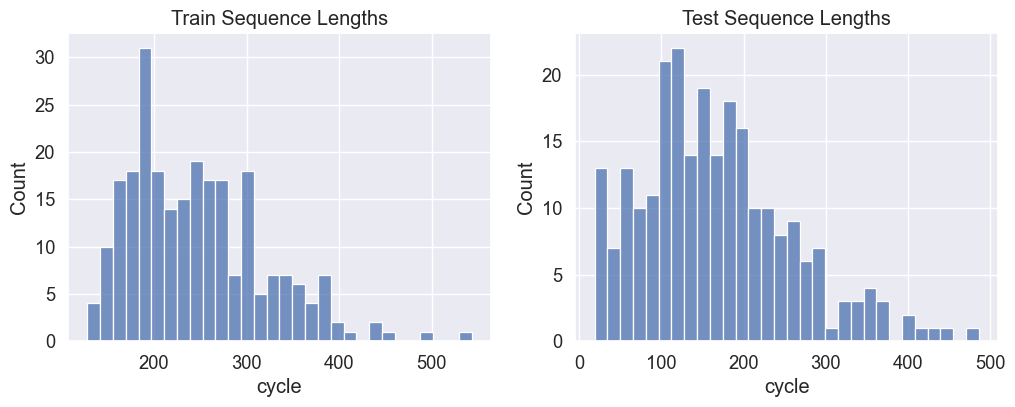

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(train_lengths,bins=30)
plt.title("Train Sequence Lengths")

plt.subplot(1,2,2)
sns.histplot(test_lengths,bins=30)
plt.title("Test Sequence Lengths")

plt.show()


- Each bar represents number of engines whose total life ended in that range.
- In TrSL, each interval size is 14 cycles, starting from 128 cycle.
- In TeSL, each interval size is 15.6 cycles, starting from 19 cycle.
- The training sequence length indicates that most of the engines have ended their lifetime in between 184 - 198 cycles.
- The testing sequence length indicates that most of the engines have ended their lifetime in between 115 - 131 cycles.

In [16]:
train.isnull().sum()

unit     0
cycle    0
op1      0
op2      0
op3      0
s1       0
s2       0
s3       0
s4       0
s5       0
s6       0
s7       0
s8       0
s9       0
s10      0
s11      0
s12      0
s13      0
s14      0
s15      0
s16      0
s17      0
s18      0
s19      0
s20      0
s21      0
dtype: int64

In [17]:
constant_cols=[c for c in train.columns if train[c].nunique()<=2]
print(constant_cols)

['op3', 's16', 's19']


In [18]:
sensors_cols=[f"s{i}" for i in range(1,22)]

sensor_stats=train[sensors_cols].describe()
display(sensor_stats)

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,472.882435,579.420056,1417.896600,1201.915359,8.031626,11.589457,283.328633,2228.686034,8524.673301,1.096445,...,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,26.436832,37.342647,106.167598,119.327591,3.622872,5.444017,146.880210,145.348243,336.927547,0.127681,...,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,445.000000,535.480000,1242.670000,1024.420000,3.910000,5.670000,136.170000,1914.720000,7984.510000,0.930000,...,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,445.000000,549.330000,1350.550000,1119.490000,3.910000,5.720000,142.920000,2211.950000,8320.590000,1.020000,...,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,462.540000,555.740000,1367.680000,1136.920000,7.050000,9.030000,194.960000,2223.070000,8362.760000,1.030000,...,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,491.190000,607.070000,1497.420000,1302.620000,10.520000,15.480000,394.280000,2323.930000,8777.250000,1.260000,...,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,518.670000,644.420000,1613.000000,1440.770000,14.620000,21.610000,570.810000,2388.640000,9196.810000,1.320000,...,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


In [19]:
op_cols=[f"op{i}" for i in range(1,4)]

train[op_cols].describe()

,op1,op2,op3
count,61249.000000,61249.000000,61249.000000
mean,23.999823,0.571347,94.031576
std,14.780722,0.310703,14.251954
min,0.000000,0.000000,60.000000
25%,10.004600,0.250700,100.000000
50%,25.001400,0.700000,100.000000
75%,41.998100,0.840000,100.000000
max,42.008000,0.842000,100.000000


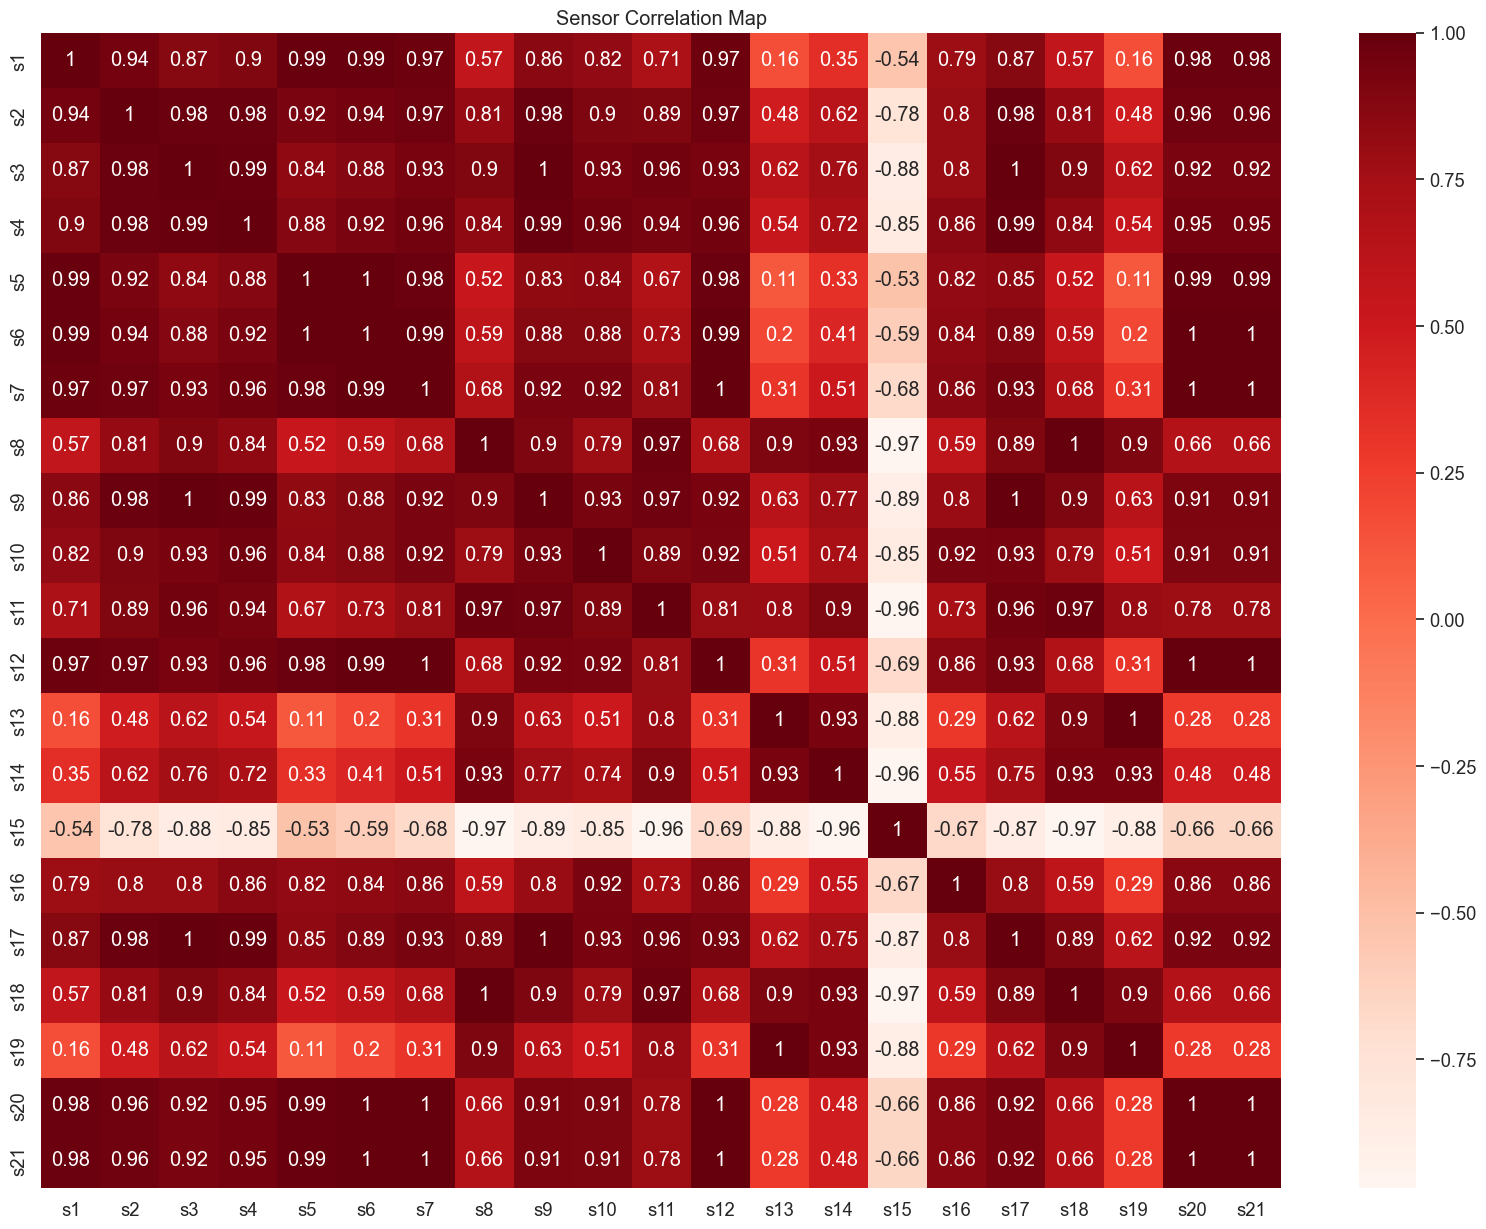

In [20]:
plt.figure(figsize=(20,15))
corr= train[sensors_cols].corr()
sns.heatmap(corr, cmap='Reds',annot=True)
plt.title("Sensor Correlation Map")
plt.show()

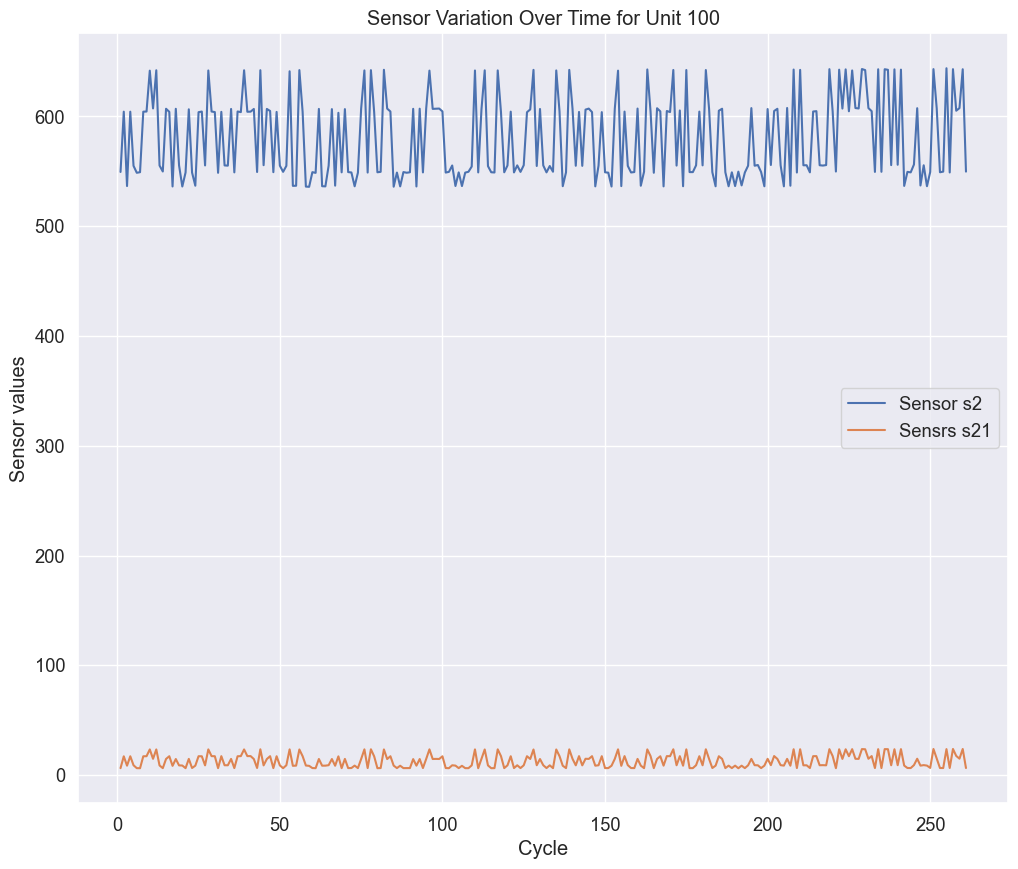

In [21]:
unit_id=100
sub = train[train.unit==unit_id]

plt.figure(figsize=(12,10))
plt.plot(sub.cycle,sub.s2,label="Sensor s2")
plt.plot(sub.cycle,sub.s21,label='Sensrs s21')

plt.title(f"Sensor Variation Over Time for Unit {unit_id}")
plt.xlabel("Cycle");
plt.ylabel("Sensor values")
plt.legend()

plt.show()

In [22]:
train.drop(columns=['s1','s5','s6','s10','s16','s18','s19'], inplace=True)
#drop irrelevant sensors with constant or negligible variance

In [23]:
train.columns

Index(['unit', 'cycle', 'op1', 'op2', 'op3', 's2', 's3', 's4', 's7', 's8',
       's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21'],
      dtype='object')

In [25]:
train.cycle.max()

np.int64(543)

In [26]:
train.groupby('unit')['cycle'].max()

unit
1      321
2      299
3      307
4      274
5      193
      ... 
245    205
246    161
247    211
248    184
249    255
Name: cycle, Length: 249, dtype: int64

In [27]:
train['max_cycle'] = train.groupby('unit')['cycle'].transform('max')
train['RUL_Value'] = train['max_cycle']-train['cycle']
train.drop(columns=['max_cycle'],inplace=True)

train[['unit','cycle','RUL_Value']].head(500)
print(train[train.RUL_Value==542])

       unit  cycle      op1   op2    op3      s2       s3       s4      s7  \
28681   118      1  10.0013  0.25  100.0  604.35  1490.15  1295.63  396.15   

            s8       s9    s11     s12      s13      s14     s15  s17    s20  \
28681  2318.82  8777.32  45.29  372.74  2388.06  8135.52  8.5409  367  28.84   

           s21  RUL_Value  
28681  17.2936        542  


In [28]:
train.RUL_Value.max()

np.int64(542)

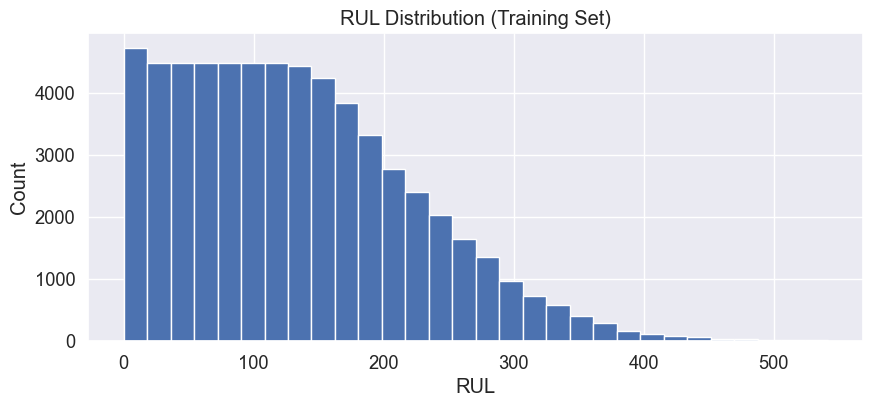

count    61249.000000
mean       133.311417
std         89.783389
min          0.000000
25%         61.000000
50%        122.000000
75%        190.000000
max        542.000000
Name: RUL_Value, dtype: float64

In [29]:
plt.figure(figsize=(10,4))
plt.hist(train.RUL_Value, bins=30)
plt.title("RUL Distribution (Training Set)")
plt.xlabel("RUL")
plt.ylabel("Count")
plt.show()

train.RUL_Value.describe()


The RUL distribution shows that the dataset contains many samples with low RUL (because every engine approaches failure), and very few samples with high RUL (because only early cycles have high RUL values).

in other words, sabu engines ro life cycle terminate 0-30 bhitare hauchi

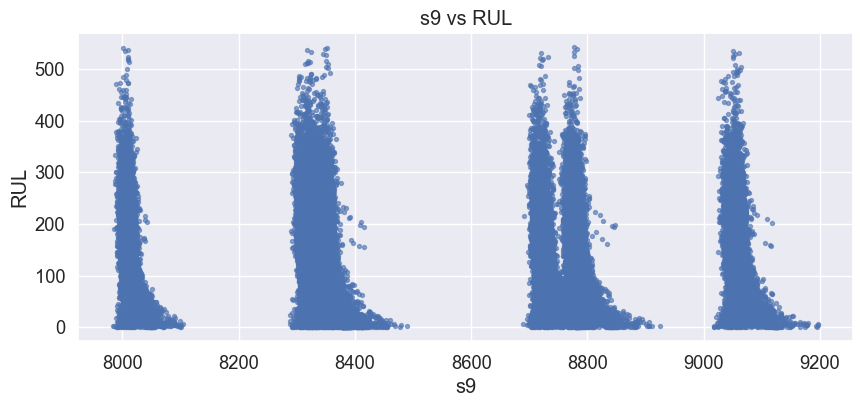

In [30]:
plt.figure(figsize=(10,4))
plt.scatter(train.s9,train.RUL_Value,s=8,alpha=0.6)
plt.title("s9 vs RUL")
plt.xlabel("s9")
plt.ylabel("RUL")
plt.show()

In [31]:
sensors_cols_aftDrop=['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']

# for uid in range(1,250):
#     for col in sensors_cols_aftDrop:
#         sub = train[train.unit ==uid ].sort_values("cycle")

#         plt.figure(figsize=(12,5))
#         plt.plot(sub.cycle, sub[col], label="Raw")
#         plt.plot(sub.cycle, sub[col].rolling(10).mean(), label="Rolling Mean (10)", linewidth=2)
#         plt.title(f"Noise Check for Sensor {col} — Unit {uid}")
#         plt.xlabel("Cycle")
#         plt.ylabel(f"Sensor {col} readings")
#         plt.legend()
#         plt.show() 


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.9, 3.7, 5.1, 7.2, 8.8, 10.1])

# Fit a 1st-degree polynomial (linear regression)
coeffs = np.polyfit(x, y, 1)
print("Coefficients:", coeffs)



Coefficients: [1.52571429 2.48571429]


In [33]:
train.head()

,unit,cycle,op1,op2,op3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL_Value
0,1,1,42.0049,0.8400,100.0,549.68,1343.43,1112.93,137.36,2211.86,8311.32,41.69,129.78,2387.99,8074.83,9.3335,330,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,606.07,1477.61,1237.50,332.10,2323.66,8713.60,43.94,312.59,2387.73,8046.13,9.1913,361,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,548.95,1343.12,1117.05,138.18,2211.92,8306.69,41.66,129.62,2387.97,8066.62,9.4007,329,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,548.70,1341.24,1118.03,137.98,2211.88,8312.35,41.68,129.80,2388.02,8076.05,9.3369,328,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,536.10,1255.23,1033.59,174.82,1915.22,7994.94,36.48,164.11,2028.08,7865.80,10.8366,305,14.03,8.6754,316


In [34]:
mean_cycles = train.groupby("unit")["cycle"].max().mean()
mean_cycles

np.float64(245.97991967871485)

In [35]:
train=train.drop(columns=['s2','s7','s8','s17','s21'])
train.head()

,unit,cycle,op1,op2,op3,s3,s4,s9,s11,s12,s13,s14,s15,s20,RUL_Value
0,1,1,42.0049,0.8400,100.0,1343.43,1112.93,8311.32,41.69,129.78,2387.99,8074.83,9.3335,10.62,320
1,1,2,20.0020,0.7002,100.0,1477.61,1237.50,8713.60,43.94,312.59,2387.73,8046.13,9.1913,24.37,319
2,1,3,42.0038,0.8409,100.0,1343.12,1117.05,8306.69,41.66,129.62,2387.97,8066.62,9.4007,10.48,318
3,1,4,42.0000,0.8400,100.0,1341.24,1118.03,8312.35,41.68,129.80,2388.02,8076.05,9.3369,10.54,317
4,1,5,25.0063,0.6207,60.0,1255.23,1033.59,7994.94,36.48,164.11,2028.08,7865.80,10.8366,14.03,316


In [36]:
train.to_csv("train_FD004_with_RULF.csv", index=False)

### Findings Summary (Exploration Notebook)

**Dataset Characteristics**
- Number of units (train/test):  249/248
- Typical cycle length range: 245 cycles across all the engines
- No missing values / missing values found: no

**Sensor Behavior**
- Highly correlated sensors: [s3, s4, s9, s11, s12, s13, s14, s15, s20]
- Constant/near-constant sensors to drop: [s1, s2, s5, s6, s10, s16 ,s18, s19]
- Sensors showing clear degradation trends: [s3, s4,s7,s8, s9, s11, s12, s13, s14, s15, s17, s20, s21]
- Degradation means sensor must change in the SAME direction for MOST units
- Degradation is directional consistency, not direction sign.

**Operational Settings**
- Variation patterns in op1/op2/op3:  we will cluster the rows using op1,op2,op3. And after clustering, each data point will have a cluster ID, then instead of normalizing the sensors globally, we will normalize the sensors for each cluster.
Basically, a separate column clusterid, representing each datapoint and which cluster they belong.
Bcoz, the model will understand in what operation regime , how to predict.
- Whether normalization per-setting might help: yes, but after making clusters using op1,op2,op3.

**RUL Observations**
- Distribution shape: Left Skewed. (most of the samples tends to run till failure, between 0-30 there are 4000+ datapoints)
- cap RUL : 125 

**Decisions for Feature Engineering**
1. Window sizes to use: 10
2. Denoising: YES, there are lot of noises in the sensor data as seen from rolling mean.
3. Sensors to keep: [s3,s4,s9,s11,s12,s13,s14,s15,s20]  
4. Scaling method: StandardScaler(or min max in case) 



In [37]:
for uid, g in train.groupby('unit'):
    g=g.sort_values('cycle')
g    

,unit,cycle,op1,op2,op3,s3,s4,s9,s11,s12,s13,s14,s15,s20,RUL_Value
60994,249,1,41.9993,0.8409,100.0,1343.85,1111.03,8296.96,41.69,129.46,2387.97,8068.65,9.3383,10.48,254
60995,249,2,42.0073,0.8400,100.0,1343.11,1108.02,8304.82,41.56,129.91,2387.98,8075.72,9.3616,10.58,253
60996,249,3,20.0058,0.7000,100.0,1478.88,1244.42,8709.26,43.99,312.69,2387.85,8053.84,9.1826,24.59,252
60997,249,4,10.0039,0.2500,100.0,1488.19,1297.50,8773.14,44.95,370.86,2387.83,8124.24,8.6464,28.80,251
60998,249,5,9.9990,0.2500,100.0,1490.03,1294.91,8766.53,44.90,370.42,2387.86,8123.00,8.6340,28.69,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,1516.36,1315.28,8840.16,46.08,380.16,2388.73,8185.69,8.4541,29.11,4
61245,249,252,0.0028,0.0015,100.0,1598.92,1426.77,9117.12,48.04,535.02,2388.46,8185.47,8.2221,39.38,3
61246,249,253,0.0029,0.0000,100.0,1607.72,1430.56,9126.53,48.24,535.41,2388.48,8193.94,8.2525,39.78,2
61247,249,254,35.0046,0.8400,100.0,1381.29,1148.18,8403.64,42.53,187.92,2388.83,8125.64,9.0515,15.26,1
